In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("adult.csv")
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [3]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  32561
Columns  :  15

Features : 
 ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']

Missing values :   0

Unique values :  
 age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64


**Preprocessing**

In [4]:
# encode categorical variables using label Encoder
from sklearn import preprocessing
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [5]:
# apply label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,0,11,6,0,1,4,0,39,0
1,4,11,6,4,1,4,0,39,0
2,0,15,6,0,4,2,0,39,0
3,4,5,0,7,4,4,0,39,0
4,4,15,5,10,3,4,0,39,0


In [6]:
# Next, Concatenate df_categorical dataframe with original df (dataframe)
# Drop earlier duplicate columns which had categorical values
df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,90,77053,9,0,4356,40,0,11,6,0,1,4,0,39,0
1,82,132870,9,0,4356,18,4,11,6,4,1,4,0,39,0
2,66,186061,10,0,4356,40,0,15,6,0,4,2,0,39,0
3,54,140359,4,0,3900,40,4,5,0,7,4,4,0,39,0
4,41,264663,10,0,3900,40,4,15,5,10,3,4,0,39,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   fnlwgt          32561 non-null  int64
 2   education.num   32561 non-null  int64
 3   capital.gain    32561 non-null  int64
 4   capital.loss    32561 non-null  int64
 5   hours.per.week  32561 non-null  int64
 6   workclass       32561 non-null  int64
 7   education       32561 non-null  int64
 8   marital.status  32561 non-null  int64
 9   occupation      32561 non-null  int64
 10  relationship    32561 non-null  int64
 11  race            32561 non-null  int64
 12  sex             32561 non-null  int64
 13  native.country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [8]:
# convert target variable income to categorical
df['income'] = df['income'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   fnlwgt          32561 non-null  int64   
 2   education.num   32561 non-null  int64   
 3   capital.gain    32561 non-null  int64   
 4   capital.loss    32561 non-null  int64   
 5   hours.per.week  32561 non-null  int64   
 6   workclass       32561 non-null  int64   
 7   education       32561 non-null  int64   
 8   marital.status  32561 non-null  int64   
 9   occupation      32561 non-null  int64   
 10  relationship    32561 non-null  int64   
 11  race            32561 non-null  int64   
 12  sex             32561 non-null  int64   
 13  native.country  32561 non-null  int64   
 14  income          32561 non-null  category
dtypes: category(1), int64(14)
memory usage: 3.5 MB


***Model Building***

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop('income',axis=1)
y = df['income']

In [11]:
X.head(3)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,90,77053,9,0,4356,40,0,11,6,0,1,4,0,39
1,82,132870,9,0,4356,18,4,11,6,4,1,4,0,39
2,66,186061,10,0,4356,40,0,15,6,0,4,2,0,39


In [12]:
y.head(3)

0    0
1    0
2    0
Name: income, dtype: category
Categories (2, int64): [0, 1]

In [13]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)
X_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
5728,30,117963,13,0,0,40,4,9,2,1,0,4,1,39
10700,18,80564,9,0,0,60,0,11,4,0,3,4,1,39
29425,31,242984,10,0,0,40,4,15,5,6,1,4,1,39
2088,37,588003,13,15024,0,40,4,9,2,4,0,4,1,39
16292,40,170730,9,0,0,50,4,11,2,3,0,4,1,39


In [14]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred_default = dt_default.predict(X_test)
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7475
           1       0.76      0.50      0.60      2294

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



In [16]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[7111  364]
 [1154 1140]]
0.8446105026102979


In [17]:
!pip install pydotplus

In [18]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

# Putting features
features = list(df.columns[1:])
features

['fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

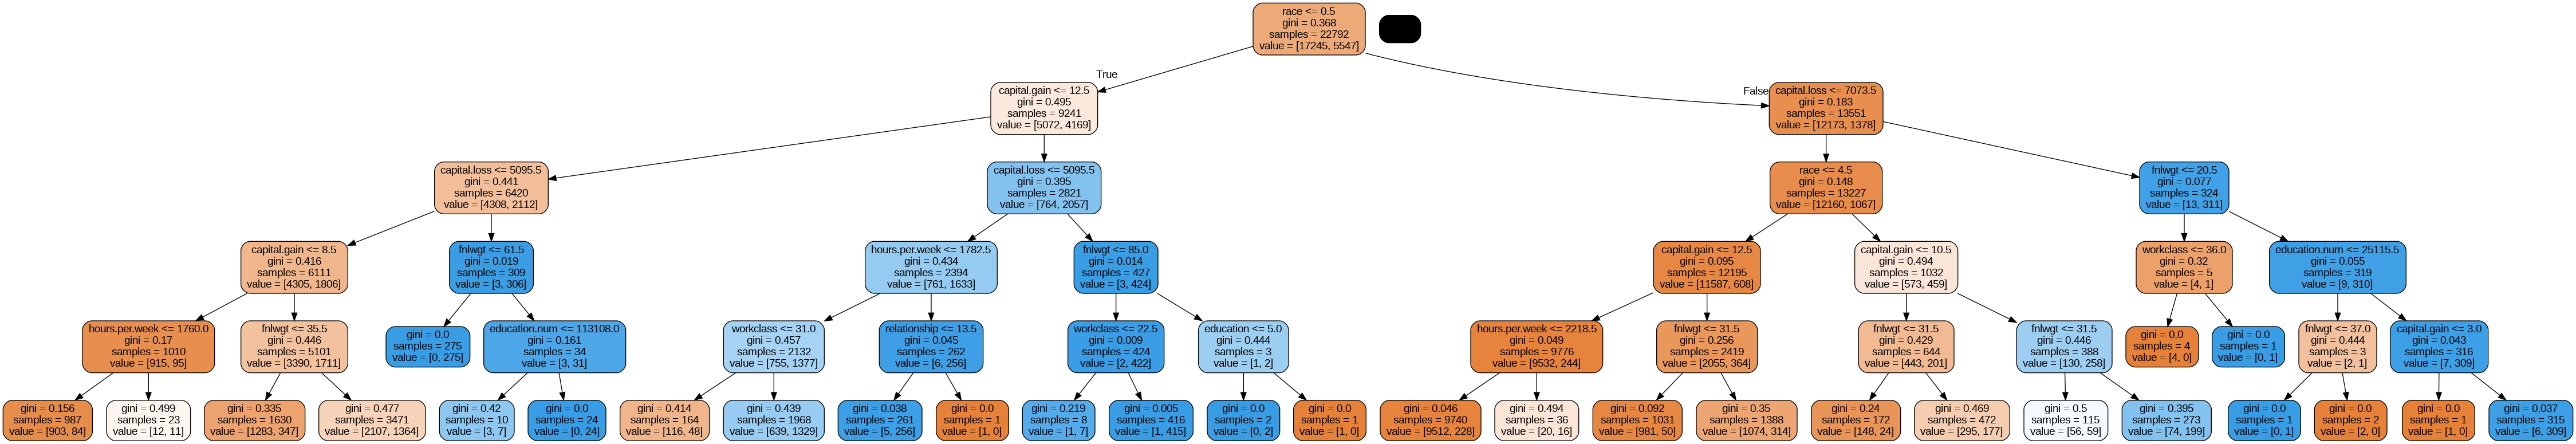

In [19]:
dot_data = StringIO()
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

The hyperparameter min_samples_leaf indicates the minimum number of samples required to be at a leaf.
So if the values of min_samples_leaf is less, say 5, then the will be constructed even if a leaf has 5, 6 etc. observations (and is likely to overfit).
Let's see what will be the optimum value for min_samples_leaf.



In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5
parameters = {'min_samples_leaf': range(5, 200, 20)}

dtree = DecisionTreeClassifier(criterion = "gini",random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             scoring='accuracy')

In [21]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.175513,0.025540,0.006999,0.002027,5,{'min_samples_leaf': 5},0.828032,0.828471,0.833260,0.829311,0.822071,0.828229,0.003592,10
1,0.276930,0.111199,0.009619,0.003121,25,{'min_samples_leaf': 25},0.843606,0.850406,0.853883,0.847740,0.840281,0.847183,0.004817,9
2,0.266601,0.034173,0.012981,0.004724,45,{'min_samples_leaf': 45},0.850625,0.850625,0.858271,0.854761,0.851031,0.853063,0.003034,3
3,0.108708,0.007625,0.010889,0.005835,65,{'min_samples_leaf': 65},0.850186,0.853038,0.853006,0.847740,0.845327,0.849859,0.003005,6
4,0.120745,0.016959,0.011103,0.011498,85,{'min_samples_leaf': 85},0.849309,0.850186,0.853444,0.850154,0.844449,0.849509,0.002898,7


The hyperparameter min_samples_split is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

In [ ]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.228439,0.065863,0.013353,0.006299,5,{'min_samples_leaf': 5},0.828032,0.828471,0.833260,0.829311,0.822071,0.828229,0.003592,10
1,0.127333,0.016337,0.006742,0.000326,25,{'min_samples_leaf': 25},0.843606,0.850406,0.853883,0.847740,0.840281,0.847183,0.004817,9
2,0.110355,0.018286,0.007531,0.002102,45,{'min_samples_leaf': 45},0.850625,0.850625,0.858271,0.854761,0.851031,0.853063,0.003034,3
3,0.098082,0.006524,0.007646,0.002988,65,{'min_samples_leaf': 65},0.850186,0.853038,0.853006,0.847740,0.845327,0.849859,0.003005,6
4,0.114428,0.034493,0.010196,0.005237,85,{'min_samples_leaf': 85},0.849309,0.850186,0.853444,0.850154,0.844449,0.849509,0.002898,7


**Finding The Optimal Hyperparameters**

In [22]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,cv = n_folds, verbose = 1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [23]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.043033,0.001629,0.003535,0.000077,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.852380,0.846458,0.846643,0.844669,0.848179,0.847666,0.002607,15
1,0.043229,0.001698,0.004212,0.000829,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.852380,0.846458,0.846643,0.844669,0.848179,0.847666,0.002607,15
2,0.040632,0.000404,0.003617,0.000157,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.852380,0.846458,0.846643,0.844669,0.850373,0.848104,0.002831,13
3,0.042746,0.002226,0.003615,0.000125,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.852380,0.846458,0.846643,0.844669,0.850373,0.848104,0.002831,13
4,0.067596,0.002830,0.003822,0.000218,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.854793,0.850844,0.851470,0.850373,0.846424,0.850781,0.002673,7
5,0.070040,0.004616,0.003872,0.000332,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.854793,0.850844,0.851470,0.850373,0.846424,0.850781,0.002673,7
6,0.063314,0.001237,0.003779,0.000127,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.856328,0.848432,0.853006,0.850154,0.851689,0.851922,0.002682,3
7,0.063489,0.002631,0.003652,0.000031,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.856328,0.848432,0.853006,0.850154,0.851689,0.851922,0.002682,3
8,0.040780,0.003104,0.005353,0.002932,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.851722,0.846458,0.846643,0.853225,0.848179,0.849245,0.002744,11
9,0.039495,0.000608,0.003528,0.000093,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.851722,0.846458,0.846643,0.853225,0.848179,0.849245,0.002744,11


In [24]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8530186783184268
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [25]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [26]:
clf_gini.score(X_test,y_test)

0.8520831200737026

In [27]:
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [28]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=3,
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8400040945849114


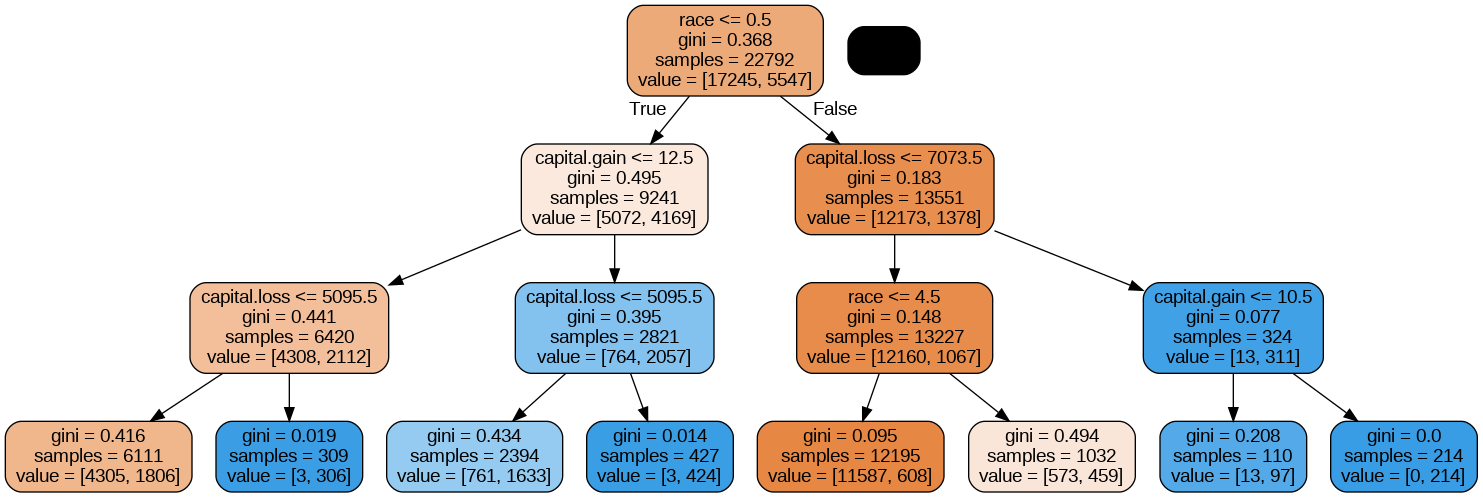

In [29]:
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7475
           1       0.76      0.47      0.58      2294

    accuracy                           0.84      9769
   macro avg       0.81      0.71      0.74      9769
weighted avg       0.83      0.84      0.83      9769



In [31]:
print(confusion_matrix(y_test,y_pred))

[[7136  339]
 [1224 1070]]
